### How to push to github
##### Write the following in the git terminal:
##### git add *
##### git commit -m "Write the changes in the file that were done here"
##### git push

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from scipy.special import kn
from scipy.integrate import quad
import csv
from scipy import optimize
from scipy import integrate
from scipy.integrate import odeint
import pandas as pd

In [3]:
%run CrossSectionFunctions.ipynb


particle_mass = {
    'Proton': 1e-6,
    'Neutron': 1e-5,
    'Lambda': 1e-6,
    'ChargedPion': 1e-7,
    'NeutralPion': 10,
    'ChargedKaon': 0.5e-8,
    'NeutralKaon': 1e-8,
}

particle_cross_sections = {
    'Proton': 0.5e-7,
    'Neutron': 1e-7,
    'Lambda': 1e-9,
    'ChargedPion': 0.5e-5,
    'NeutralPion': 1e-5,
    'ChargedKaon': 0.5e-6,
    'NeutralKaon': 1e-6,
}


particle_ratios = {
    particle: particle_mass[particle] / particle_mass["Lambda"]
    for particle in particle_mass
}

linestyles = {
    "Proton": "-", 
    "Neutron": "--", 
    "Lambda": "-.", 
    "ChargedPion": ":", 
    "NeutralPion": (0, (3, 1, 1, 1)),  # Custom dash pattern
    "ChargedKaon": (0, (5, 2)), 
    "NeutralKaon": (0, (1, 1))
}


C:\Users\press\AppData\Local\Temp\ipykernel_23128\2044238584.py:15: IntegrationWarning: The algorithm does not converge.  Roundoff error is detected
  in the extrapolation table.  It is assumed that the requested tolerance
  cannot be achieved, and that the returned result (if full_output = 1) is 
  the best which can be obtained.
  integral_result, error = quad(integrand, 4 * mass**2, np.inf)


Σm_i*Y_i = 0.006647531053987828 GeV


Text(0.02, 0.02, 'Σm_i*Y_i = 6.65e-03 GeV')

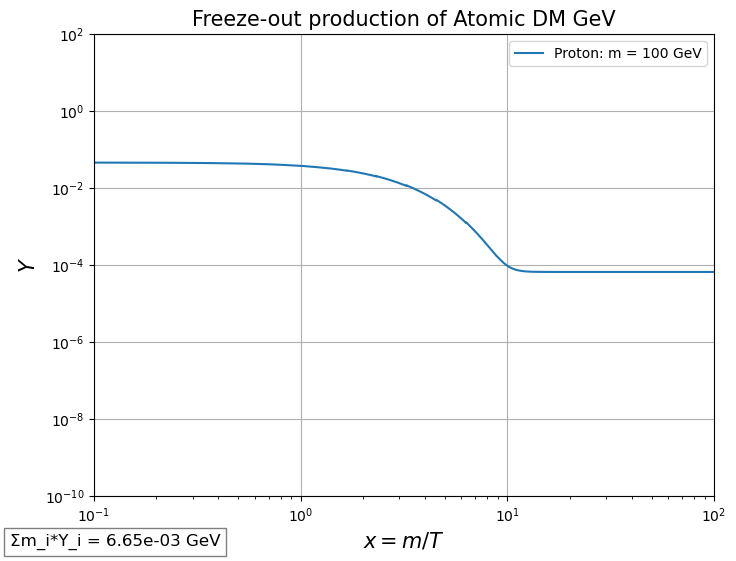

In [4]:
%run FreezeOutFunctions.ipynb
#%run CrossSectionFunctions.ipynb

particle_mass = {
    'Proton': 100,
    'NeutralPion': 1,
}

particle_coupling_constants = {
    'NeutralPion': 1e-1,
}

particles = ['Proton']#["Proton", "Neutron", "Lambda", "ChargedPion", "NeutralPion", "ChargedKaon", "NeutralKaon"]

xmax = 1e2

#plt.rcParams['figure.dpi'] = 300
plt.figure(figsize=(8, 6))

x=np.logspace(np.log10(0.1),np.log10(xmax),10000)

FreezeOutNumber = np.array([])
masses = np.array([])

for particle in particles:
    #cross_section = particle_cross_sections.get(particle,1)
    mass = particle_mass.get(particle,1)
    
    Y=integrate.odeint(dYdx,Y_EQ(x[0], particle), x, args=(particle,))
    Decay_rate = AvgDecayRate(x)
    Y_New = Y.reshape(1,-1)
    
    if particle in ("Lambda", "NeutralKaon", "ChargedKaon"):
        Y_Decayed = np.multiply(Y_New,Decay_rate)
        Y_Decayed_New = Y_Decayed.reshape(-1,1)
        FreezeOutNumber = np.append(FreezeOutNumber,Y_Decayed_New[-1])
        #print(f'Frozen-out value of {particle} with sigma = {cross_section}, and mass = {mass} GeV is {Y_Decayed_New[-1]}')
        plt.loglog(x, Y_Decayed_New, label=f'{particle} σv = {cross_section}, m = {mass} GeV', linestyle=linestyles.get(particle, "-"))
        
    else:
        plt.loglog(x, Y, label=f'{particle}: m = {mass} GeV', linestyle=linestyles.get(particle, "-"))
        FreezeOutNumber = np.append(FreezeOutNumber,Y[-1])

        #print(f'Frozen-out value of {particle} with sigma = {cross_section}, and mass = {mass} GeV is {Y[-1]}')
    
    masses = np.append(masses, mass)

#print('Frozen-out values: ', FreezeOutNumber)
#print(f'Particle masses: {masses}')
#print('mult', np.multiply(masses,FreezeOutNumber))
print(f'Σm_i*Y_i = {np.sum(np.multiply(masses,FreezeOutNumber))} GeV')

plt.ylim(1e-10,1e2)
plt.xlim(1e-1,xmax)
plt.xlabel('$x = m/T$', size= 15)
plt.ylabel('$Y$', size= 15)
plt.title('Freeze-out production of Atomic DM GeV', size= 15)
plt.legend()
plt.grid()
plt.gcf().text(0.02, 0.02, f"Σm_i*Y_i = {format(np.sum(np.multiply(masses, FreezeOutNumber)), '.2e')} GeV", fontsize=12, ha='left', va='bottom', bbox=dict(facecolor='white', alpha=0.5))
#plt.savefig('Particles.png', facecolor = 'w')

Text(2.3, 1000.0, 'Vacuum Energy dominated universe')

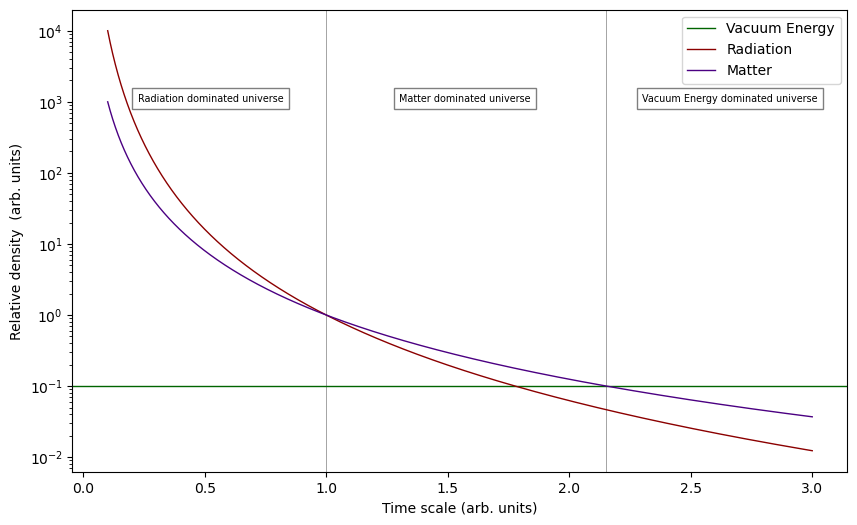

In [5]:
def lightdom(x):
    return x**(-4)

def matterdom(x):
    return x**(-3)

#plt.rcParams['figure.dpi'] = 300
plt.figure(figsize=(10, 6))

T_ex = np.linspace(0.1, 3, num = 10000)

Y_lightdom = lightdom(T_ex)
Y_matterdom = matterdom(T_ex)

plt.axvline(1, alpha = 0.5, linewidth = 0.5, color = 'black')
plt.axvline(2.15, alpha = 0.5, linewidth = 0.5, color = 'black')
plt.axhline(1e-1, linewidth = 1, color = 'darkgreen', label = 'Vacuum Energy')
plt.plot(T_ex,Y_lightdom, label = 'Radiation', color = 'darkred',linewidth = 1)
plt.plot(T_ex, Y_matterdom, label = 'Matter', color = 'indigo', linewidth = 1)
plt.legend()
plt.xlabel('Time scale (arb. units)')
plt.ylabel('Relative density  (arb. units)')
plt.yscale('log')
plt.text(1.3,1e3,"Matter dominated universe", bbox=dict(facecolor='white', alpha=0.5), size = 'x-small')
plt.text(0.225,1e3,"Radiation dominated universe", bbox=dict(facecolor='white', alpha=0.5), size = 'x-small')
plt.text(2.3,1e3,"Vacuum Energy dominated universe", bbox=dict(facecolor='white', alpha=0.5), size = 'x-small')

#plt.grid(linestyle = '--')
#plt.ylim(0,3)
#plt.savefig('TimeScaleArb.png')

In [6]:
print(thermally_averaged_cross_section(10, "Proton"))

2.1300065746218178e-16


In [7]:
"""
particle_ratios = {
    "ChargedPion": R_CP,
    "ChargedKaon": R_CK,
    "NeutralPion": R_NP,
    "NeutralKaon": R_NK,
    "Lambda": R_L,
    "Proton": R_P,
    "Neutron": R_N,
    "TestMeson": R_testMeson,
    "TestBaryon": R_testBaryon
}

particle_mass = {
    'Proton': 1e-5,
    'Neutron': 1e-5,
    'Lambda': 1e-3,
    'ChargedPion': 1e-7,
    'NeutralPion': 1e-7,
    'ChargedKaon': 1e-6,
    'NeutralKaon': 1e-6,
    'TestBaryon': 1e-5,
    'TestMeson': 1e-5,
}

particle_cross_sections = {
    'Proton': 1e-8,
    'Neutron': 1e-8,
    'Lambda': 1e-9,
    'ChargedPion': 1e-10,
    'NeutralPion': 1e-10,
    'ChargedKaon': 1e-10,
    'NeutralKaon': 1e-10,
    "TestMeson": 1e-7
}

particle_mass = {
    'Proton': 1e-10,
    'Neutron': 1e-10,
    'Lambda': 1e-9,
    'ChargedPion': 1e-11,
    'NeutralPion': 1e-11,
    'ChargedKaon': 0.5e-10,
    'NeutralKaon': 0.5e-10,
}

particle_cross_sections = {
    'Proton': 1e-6,
    'Neutron': 1e-6,
    'Lambda': 1e-9,
    'ChargedPion': 1e-5,
    'NeutralPion': 1e-6,
    'ChargedKaon': 1e-6,
    'NeutralKaon': 1e-7,
}


particle_mass = {
    'Proton': 1e-5,
    'Neutron': 5e-4,
    'Lambda': 5e-4,
    'ChargedPion': 1e-8,
    'NeutralPion': 5e-9,
    'ChargedKaon': 1e-6,
    'NeutralKaon': 5e-6,
    'TestBaryon': 1e-5,
    'TestMeson': 1e-5,
}

particle_cross_sections = {
    'Proton': 1e-8,
    'Neutron': 1e-8,
    'Lambda': 1e-7,
    'ChargedPion': 1e-13,
    'NeutralPion': 1e-13,
    'ChargedKaon': 1e-10,
    'NeutralKaon': 1e-10,
    "TestMeson": 1e-7
}


##this one works for decaying particles
particle_mass = {
    'Proton': 1e-6,
    'Neutron': 1e-5,
    'Lambda': 1e-6,
    'ChargedPion': 1e-7,
    'NeutralPion': 1e-6,
    'ChargedKaon': 0.5e-8,
    'NeutralKaon': 1e-8,
}

particle_cross_sections = {
    'Proton': 0.5e-7,
    'Neutron': 1e-7,
    'Lambda': 1e-9,
    'ChargedPion': 0.5e-5,
    'NeutralPion': 1e-5,
    'ChargedKaon': 0.5e-6,
    'NeutralKaon': 1e-6,
}


# PARTICLE RATIOS TO SCALE THE X VALUES. EVERYTHING IS SCALED BASED OFF THE NEUTRAL PION AS IT IS THE LIGHTEST HADRON
R_NP = particle_mass.get("NeutralPion")/particle_mass.get("Lambda")
R_CP = particle_mass.get("ChargedPion")/particle_mass.get("Lambda")
R_NK = particle_mass.get("NeutralKaon")/particle_mass.get("Lambda")
R_CK = particle_mass.get("ChargedKaon")/particle_mass.get("Lambda")
R_L = 1
R_P = particle_mass.get("Proton")/particle_mass.get("Lambda")
R_N = particle_mass.get("Neutron")/particle_mass.get("Lambda")

particle_ratios = {
    "ChargedPion": R_CP,
    "ChargedKaon": R_CK,
    "NeutralPion": R_NP,
    "NeutralKaon": R_NK,
    "Lambda": R_L,
    "Proton": R_P,
    "Neutron": R_N,
}
"""

'\nparticle_ratios = {\n    "ChargedPion": R_CP,\n    "ChargedKaon": R_CK,\n    "NeutralPion": R_NP,\n    "NeutralKaon": R_NK,\n    "Lambda": R_L,\n    "Proton": R_P,\n    "Neutron": R_N,\n    "TestMeson": R_testMeson,\n    "TestBaryon": R_testBaryon\n}\n\nparticle_mass = {\n    \'Proton\': 1e-5,\n    \'Neutron\': 1e-5,\n    \'Lambda\': 1e-3,\n    \'ChargedPion\': 1e-7,\n    \'NeutralPion\': 1e-7,\n    \'ChargedKaon\': 1e-6,\n    \'NeutralKaon\': 1e-6,\n    \'TestBaryon\': 1e-5,\n    \'TestMeson\': 1e-5,\n}\n\nparticle_cross_sections = {\n    \'Proton\': 1e-8,\n    \'Neutron\': 1e-8,\n    \'Lambda\': 1e-9,\n    \'ChargedPion\': 1e-10,\n    \'NeutralPion\': 1e-10,\n    \'ChargedKaon\': 1e-10,\n    \'NeutralKaon\': 1e-10,\n    "TestMeson": 1e-7\n}\n\nparticle_mass = {\n    \'Proton\': 1e-10,\n    \'Neutron\': 1e-10,\n    \'Lambda\': 1e-9,\n    \'ChargedPion\': 1e-11,\n    \'NeutralPion\': 1e-11,\n    \'ChargedKaon\': 0.5e-10,\n    \'NeutralKaon\': 0.5e-10,\n}\n\nparticle_cross_sections =

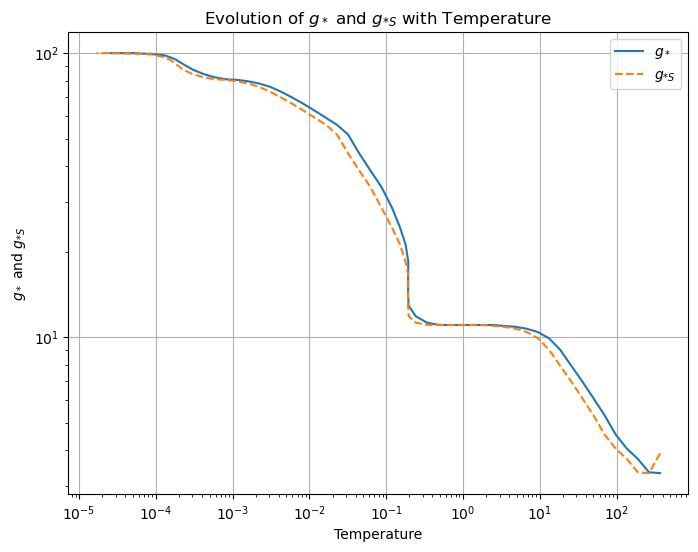

In [8]:
# Load the data
Gstar_df = pd.read_csv("Gstar.csv", header = None)
GstarS_df = pd.read_csv("GstarS.csv", header = None)

# Convert to dictionaries while preserving order
Gstar = dict(zip(Gstar_df.iloc[:, 0], Gstar_df.iloc[:, 1]))
GstarS = dict(zip(GstarS_df.iloc[:, 0], GstarS_df.iloc[:, 1]))


# Extract temperature values and corresponding function values in original order
temps_Gstar = Gstar_df.iloc[:, 0].values  # Keep order from CSV
values_Gstar = np.flip(Gstar_df.iloc[:, 1].values)  

temps_GstarS = GstarS_df.iloc[:, 0].values  # Keep order from CSV
values_GstarS = np.flip(GstarS_df.iloc[:, 1].values)  

# Plot the functions
plt.figure(figsize=(8, 6))
plt.plot(temps_Gstar, values_Gstar, label="$g_*$", linestyle="-")
plt.plot(temps_GstarS, values_GstarS, label="$g_{*S}$", linestyle="--")
plt.xscale('log')

plt.yscale('log')

# Labels and title
plt.xlabel("Temperature")
plt.ylabel("$g_*$ and $g_{*S}$")
plt.title("Evolution of $g_*$ and $g_{*S}$ with Temperature")
plt.legend()
plt.grid(True)

# Show the plot
plt.show()


Frozen-out value of Proton with sigma = 1e-15, and mass = 100 GeV is [6.64753105e-05]
Σm_i*Y_i = 0.006647531053987828 GeV


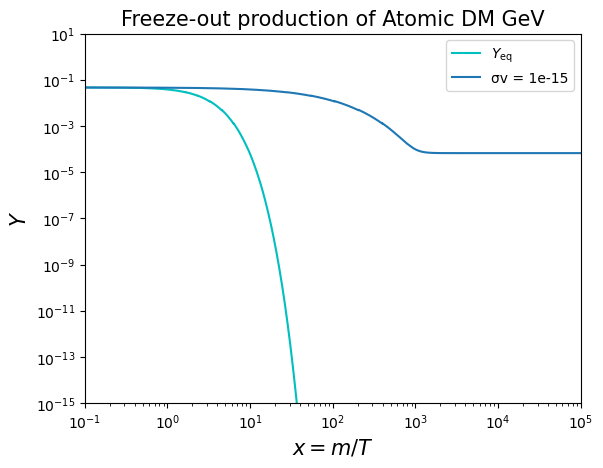

In [9]:

%run CrossSectionFunctions.ipynb
"""
# Cross-section formula for a single Lambda
def sigma(s, particle):
    #cross_section = particle_cross_sections.get(particle, 1)
    k = particle_coupling_constants.get(particle,1)
    return k/(2*s)
    #return sum(Lambda / (2 * s) for Lambda in lambdas) #Make an array that has lambdas_pion, lambdas_proton, lambdas_neutron, etc. for all of their interactions
    
def thermally_averaged_cross_section(T, particle):
    def integrand(s):
        return sigma(s, particle) * np.sqrt(s) * kn(1, np.sqrt(s) / T)

    mass = particle_mass.get(particle, 1)
    integral_result, error = quad(integrand, 4 * mass**2, np.inf)
    return (1 / (8 * mass**4 * T * kn(2, mass / T))) * integral_result
"""
def fk(particle):
    mass = particle_mass.get(particle,1)
    cross_section = particle_cross_sections.get(particle,1)
    return np.sqrt(np.pi*M_Pl**2/45)*mass*cross_section

def Variables(x, particle):
    mass = particle_mass.get(particle,1)
    T=mass/x
    return k*g_star(T)/x**2

def dYdx(Y,x,particle): # Eqn 7.10 of https://arxiv.org/pdf/1009.3690
    ratio = particle_ratios.get(particle, 1)  
    x_ratio = x*ratio
    return -(Y**2-Y_EQ(x_ratio, particle)**2)*Variables(x_ratio, particle)

particle_mass = {
    'Proton': 100,
    'Lambda': 100,
}

particle_cross_sections = {
    'Proton': 1e-15,
}

particle_ratios = {
    particle: particle_mass[particle] / particle_mass["Lambda"]
    for particle in particle_mass
}


particles = ["Proton"]#, "Neutron", "Lambda", "ChargedPion", "NeutralPion"]#, "ChargedKaon", "NeutralKaon"]
#plt.figure(figsize=(8, 6))

x=np.logspace(np.log10(0.1),np.log10(100000),10000)
xx=np.logspace(np.log10(0.1),np.log10(1000),10000)
plt.loglog(xx,Y_EQ(xx, 'Proton'),'c',label=r'$Y_{\rm eq}$')

FreezeOutNumber = np.array([])
masses = np.array([])

for particle in particles:
    cross_section = particle_cross_sections.get(particle,1)
    mass = particle_mass.get(particle,1)
    
    k=fk(particle)
    #Y=integrate.odeint(dYdx,Y_EQ(x[0], particle), x, args=(particle,))
    
    print(f'Frozen-out value of {particle} with sigma = {cross_section}, and mass = {mass} GeV is {Y[-1]}')
    
    plt.loglog(x,Y,label=f'σv = {cross_section}')
    
    FreezeOutNumber = np.append(FreezeOutNumber,Y[-1])
    masses = np.append(masses, mass)

print(f'Σm_i*Y_i = {np.sum(np.multiply(masses,FreezeOutNumber))} GeV')

plt.ylim(1E-15,10)
plt.xlim(0.1,100000)
plt.xlabel('$x = m/T$', size= 15)
plt.ylabel('$Y$', size= 15)
plt.title('Freeze-out production of Atomic DM GeV', size= 15)
plt.legend()
#plt.grid()
#plt.savefig('Particles.png')


Frozen-out value of Proton with sigma = 1e-08, and mass = 100 GeV is 1.2977340274760062e-13
Frozen-out value of Neutron with sigma = 1e-07, and mass = 100 GeV is 1.412024479821419e-14
Σm_i*Y_i = 1.438936475458148e-11 GeV


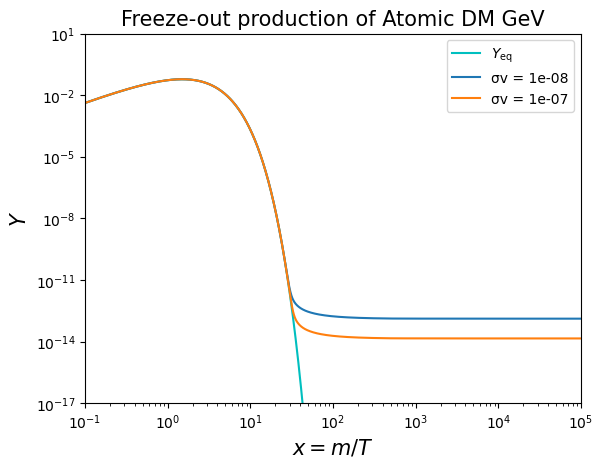

In [10]:
# Define physical constants
M_Pl = 1.22e19  # Planck mass in GeV

# Particle properties
particle_mass = {
    'Proton': 100,
    'Lambda': 100,
    'Neutron': 100,
}

particle_cross_sections = {
    'Proton': 1e-8,
    'Neutron': 1e-7
}

particle_ratios = {
    particle: particle_mass[particle] / particle_mass["Lambda"]
    for particle in particle_mass
}

# Function to compute prefactor k
def fk(particle):
    mass = particle_mass.get(particle, 1)
    cross_section = particle_cross_sections.get(particle, 1)
    return np.sqrt(np.pi * M_Pl**2 / 45) * mass * cross_section

# Function to compute variables in the Boltzmann equation
def Variables(x, particle):
    mass = particle_mass.get(particle, 1)
    T = mass / x
    return k * g_star(T) / x**2  # g_star(T) is assumed to be defined elsewhere

# Equilibrium abundance function (assumed to be pre-defined)
def Y_EQ(x, particle):
    return 0.145 * x**(3/2) * np.exp(-x)

# Boltzmann equation in log space
def dYdx_log(x, logY, particle):
    Y = np.exp(logY)
    ratio = particle_ratios.get(particle, 1)  
    x_ratio = x * ratio
    return -((Y**2 - Y_EQ(x_ratio, particle)**2) * Variables(x_ratio, particle)) / Y  # d(logY)/dx

# Integration setup
particles = ["Proton", "Neutron"]

x_min, x_max = 0.1, 1E5
x_eval = np.logspace(np.log10(x_min), np.log10(x_max), 10000)

# Plot equilibrium abundance
xx = np.logspace(np.log10(0.1), np.log10(1000), 10000)
plt.loglog(xx, Y_EQ(xx, 'Proton'), 'c', label=r'$Y_{\rm eq}$')

FreezeOutNumber = np.array([])
masses = np.array([])

for particle in particles:
    cross_section = particle_cross_sections.get(particle, 1)
    mass = particle_mass.get(particle, 1)
    
    k = fk(particle)  # Compute k for this particle

    # Solve Boltzmann equation using solve_ivp
    sol = integrate.solve_ivp(
        lambda x, logY: dYdx_log(x, logY, particle),
        (x_min, x_max),
        [np.log(Y_EQ(x_min, particle))],  # Initial condition in log space
        method='BDF',  # Stiff solver
        t_eval=x_eval,
        rtol=1e-10,
        atol=1e-10
    )

    # Convert back from log space
    Y_values = np.exp(sol.y[0])

    print(f'Frozen-out value of {particle} with sigma = {cross_section}, and mass = {mass} GeV is {Y_values[-1]}')

    plt.loglog(sol.t, Y_values, label=f'σv = {cross_section}')

    FreezeOutNumber = np.append(FreezeOutNumber, Y_values[-1])
    masses = np.append(masses, mass)

print(f'Σm_i*Y_i = {np.sum(np.multiply(masses,FreezeOutNumber))} GeV')


plt.ylim(1E-17,10)
plt.xlim(0.1,100000)
plt.xlabel('$x = m/T$', size= 15)
plt.ylabel('$Y$', size= 15)
plt.title('Freeze-out production of Atomic DM GeV', size= 15)
plt.legend()
